Part (e):
For α = -0.5, the LMCs-to-Milky-Ways ratio is 26.38
For α = -1.0, the LMCs-to-Milky-Ways ratio is 263.85
For α = -1.25, the LMCs-to-Milky-Ways ratio is 834.36
For α = -2.0, the LMCs-to-Milky-Ways ratio is 26384.72


For part (g): we see more faint galaxies at lower redshift. Logically, this is 
simply due to the selection effect of not being able to see fainter galaxies that 
are further away from us, rather than some sort of physical dependence between 
redshift and luminosity.


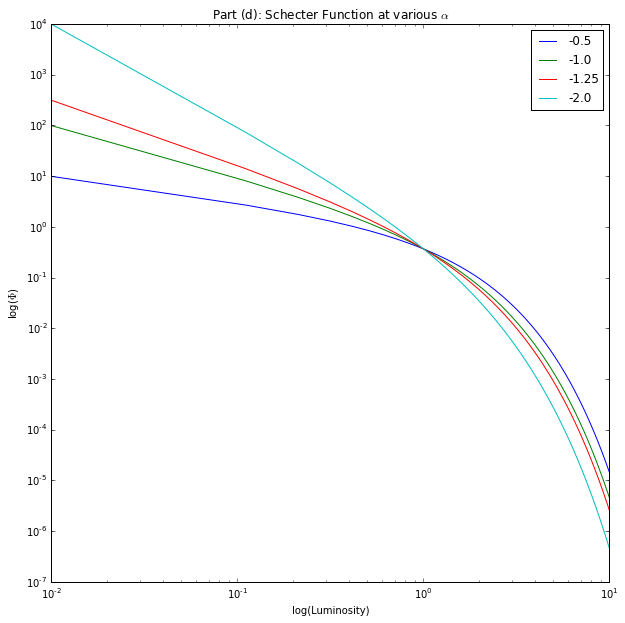

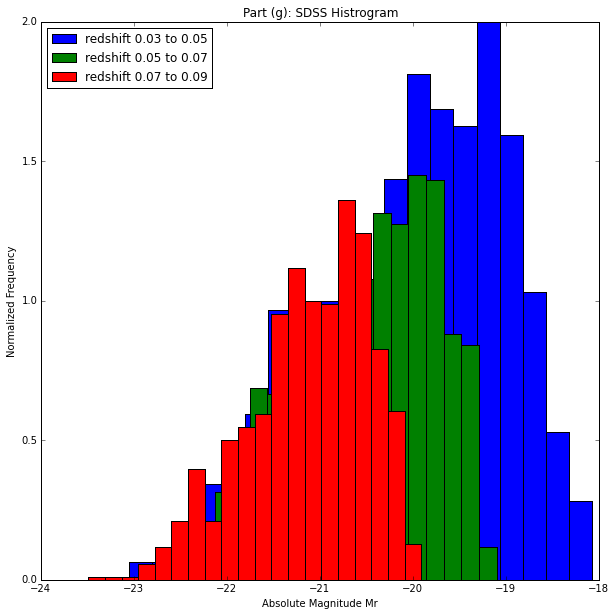

In [1]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456

Cordell Newmiller
Prof. Lubin
PHY 267
Homework 5
Problem 1
Parts (d), (e), and (g)
"""

import numpy
from matplotlib import pyplot

import CJN_Functions as my
# These are functions I wrote in PHY 266, specifically one for fitting

%matplotlib inline


# Part (d)
alpha = numpy.array([-0.5, -1, -1.25, -2])
L = numpy.linspace(.01,10,100)
schecter = ((numpy.outer(L,numpy.ones(alpha.size))) ** alpha *
            numpy.outer(numpy.exp(-L),numpy.ones(alpha.size)))

figure1 = pyplot.figure(figsize=(10,10));
pyplot.loglog(L,schecter)
pyplot.title(r'Part (d): Schecter Function at various $\alpha$')
pyplot.xlabel('log(Luminosity)')
pyplot.ylabel(r'log($\Phi$)')
pyplot.legend(alpha)


# Part (e)

h = 0.7
LMCMass = 1e10 # solar masses
MWMass = 1e12 # solar masses
Lstar = 1e10 /h**2 # solar masses

MLRatio = 50 # solar masses / solar luminosities

LMCLum = LMCMass / MLRatio
MWLum = MWMass / MLRatio

# Schecter / Schecter
LMCMWratios = numpy.power(LMCLum/MWLum,alpha) * numpy.exp((MWLum-LMCLum)/Lstar)

print('Part (e):')
for i in range(alpha.size):
    print('For α = %s, the LMCs-to-Milky-Ways ratio is %2.2f' 
          % (alpha[i],LMCMWratios[i]))



# Part (g)
# import fields
# 0   RA    
# 1   Dec     
# 2   z      redshift
# 3   DM     distance module (magnitudes)
# 4   u      model magnitude u
# 5   r      model magnitude r
data = numpy.genfromtxt('galaxiesDM.dat')

redshift = data[:,2]
DM = data[:,3]
r = data[:,5]

Mr = r-DM # absolute magnitude

numberofbins=20

# redshift bounds
bounds = numpy.array([0.03,0.05,0.07,0.09])

histvals = numpy.zeros([numberofbins,bounds.size-1])
normvals = histvals
binvals = numpy.zeros([numberofbins+1,bounds.size-1])
labellist = [None] * (bounds.size-1)
for i in range(bounds.size - 1):
    histvals[:,i],binvals[:,i]= numpy.histogram(Mr[numpy.logical_and(bounds[i]<redshift, 
                                                    redshift<bounds[i+1])],bins=numberofbins)
    location = numpy.searchsorted(binvals[:,i],-21) - 1
    normvals[:,i] = histvals[:,i] / histvals[location,i]
    labellist[i]='redshift ' + str(bounds[i]) + ' to ' + str(bounds[i+1]) 

figure2 = pyplot.figure(figsize=(10,10));

colors = ['blue','green','red']
for i in (range(bounds.size - 1)):
    pyplot.bar(binvals[:-1,i],normvals[:,i],numpy.diff(binvals[:,i]),color=colors[i])

pyplot.title('Part (g): SDSS Histrogram')
pyplot.xlabel('Absolute Magnitude Mr')
pyplot.ylabel('Normalized Frequency')
pyplot.legend(labellist, loc=2);

print('\n\nFor part (g): we see more faint galaxies at lower redshift. Logically, this is',
     '\nsimply due to the selection effect of not being able to see fainter galaxies that',
     '\nare further away from us, rather than some sort of physical dependence between',
     '\nredshift and luminosity.')

# End of problem 1